#📌 Extracción

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import scipy.stats as ss

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

df_telecomx = pd.read_json(url)
df_telecomx.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#🔧 Transformación

In [ ]:
# Flattening and Normalizing
customer_df = pd.json_normalize(df_telecomx['customer'])
phone_df = pd.json_normalize(df_telecomx['phone'])
internet_df = pd.json_normalize(df_telecomx['internet'])
account_df = pd.json_normalize(df_telecomx['account'])

df_telecomx_cleaned = pd.concat([df_telecomx[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

display(df_telecomx_cleaned.head())

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [ ]:
# Looking columns in data frame
print(df_telecomx_cleaned.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [ ]:
# Checking for nulls
print(df_telecomx_cleaned.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
# Checking nulls and types
print(df_telecomx_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
# Check for unique values in 'Charges.Total' to identify potential issues
print(df_telecomx_cleaned['Charges.Total'].unique())

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [ ]:
# Convert Charges Total from object to numeric
df_telecomx_cleaned['Charges.Total'] = pd.to_numeric(df_telecomx_cleaned['Charges.Total'], errors='coerce')

# Checking for nulls in Charges Total
df_telecomx_cleaned['Charges.Total'].isna().sum()
print(df_telecomx_cleaned['Charges.Total'].isnull().sum())

# Transforming other columns from objects to categories to optimize
cat_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod', 'gender']

df_telecomx_cleaned[cat_cols] = df_telecomx_cleaned[cat_cols].astype('category')

# Transforming customerID from
df_telecomx_cleaned['customerID'] = df_telecomx_cleaned['customerID'].astype('string')

print(df_telecomx_cleaned.info())

11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   string  
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   int64   
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          726

In [ ]:
# Check null rows with other columnns for context, to decide how to handle the nulls
df_telecomx_cleaned[df_telecomx_cleaned['Charges.Total'].isna()][['customerID', 'gender', 'tenure', 'Contract', 'PaymentMethod',  'Charges.Monthly', 'Charges.Total', ]]

customerID  gender  tenure  Contract              PaymentMethod  \
975   1371-DWPAZ  Female       0  Two year    Credit card (automatic)   
1775  2520-SGTTA  Female       0  Two year               Mailed check   
1955  2775-SEFEE    Male       0  Two year  Bank transfer (automatic)   
2075  2923-ARZLG    Male       0  One year               Mailed check   
2232  3115-CZMZD    Male       0  Two year               Mailed check   
2308  3213-VVOLG    Male       0  Two year               Mailed check   
2930  4075-WKNIU  Female       0  Two year               Mailed check   
3134  4367-NUYAO    Male       0  Two year               Mailed check   
3203  4472-LVYGI  Female       0  Two year  Bank transfer (automatic)   
4169  5709-LVOEQ  Female       0  Two year               Mailed check   
5599  7644-OMVMY    Male       0  Two year               Mailed check   

      Charges.Monthly  Charges.Total  
975             56.05            NaN  
1775            20.00            NaN  
1955            61.90            NaN  
2075            19.70            NaN  
2232            20.25            NaN  
2308            25.35            NaN  
2930            73.35            NaN  
3134            25.75            NaN  
3203            52.55            NaN  
4169            80.85            NaN  
5599            19.85            NaN

In [ ]:
# Dropping nan rows for cleaning
df_telecomx_cleaned.dropna(subset=['Charges.Total'], inplace=True)
df_telecomx_cleaned.reset_index(drop=True, inplace=True)

print(df_telecomx_cleaned.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
# Creating Charges.Daily column
df_telecomx_cleaned['Charges.Daily'] = (df_telecomx_cleaned['Charges.Monthly'] / 30).round(2)

# Reorder columns: insert Charges.Daily after PaymentMethod
cols = list(df_telecomx_cleaned.columns)
payment_idx = cols.index('PaymentMethod')

# Insert 'Charges.Daily' just after 'PaymentMethod'
cols.insert(payment_idx + 1, cols.pop(cols.index('Charges.Daily')))
df_telecomx_cleaned = df_telecomx_cleaned[cols]

display(df_telecomx_cleaned.head())


customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Charges.Daily Charges.Monthly  Charges.Total  
0      Mailed check          2.19            65.6         593.30  
1      Mailed check          2.00            59.9         542.40  
2  Electronic check          2.46            73.9         280.85  
3  Electronic check          3.27            98.0        1237.85  
4      Mailed check          2.80            83.9         267.40  

[5 rows x 22 columns]

In [ ]:
# Checking for duplicates
df_telecomx_cleaned.duplicated().sum()
print(df_telecomx_cleaned.duplicated().sum())

#STANDARDIZING
# Looking raw labels in category columns
for col in cat_cols:
    print(f"Column: {col}")
    print(df_telecomx_cleaned[col].cat.categories)
    print("="*40)

# Cleaning labels, Standardizing data on categorical columns
for col in cat_cols:
    df_telecomx_cleaned[col] = df_telecomx_cleaned[col].astype(str).str.strip().str.lower().str.replace(' ', '_').astype('category')

# Verifying with .unique
for col in cat_cols:
    print(f"{col}: { df_telecomx_cleaned[col].unique()}")


# Renaming columns for ez read by stakeholders (pendiente)

0
Column: Churn
Index(['', 'No', 'Yes'], dtype='object')
Column: Partner
Index(['No', 'Yes'], dtype='object')
Column: Dependents
Index(['No', 'Yes'], dtype='object')
Column: PhoneService
Index(['No', 'Yes'], dtype='object')
Column: MultipleLines
Index(['No', 'No phone service', 'Yes'], dtype='object')
Column: InternetService
Index(['DSL', 'Fiber optic', 'No'], dtype='object')
Column: OnlineSecurity
Index(['No', 'No internet service', 'Yes'], dtype='object')
Column: OnlineBackup
Index(['No', 'No internet service', 'Yes'], dtype='object')
Column: DeviceProtection
Index(['No', 'No internet service', 'Yes'], dtype='object')
Column: TechSupport
Index(['No', 'No internet service', 'Yes'], dtype='object')
Column: StreamingTV
Index(['No', 'No internet service', 'Yes'], dtype='object')
Column: StreamingMovies
Index(['No', 'No internet service', 'Yes'], dtype='object')
Column: Contract
Index(['Month-to-month', 'One year', 'Two year'], dtype='object')
Column: PaperlessBilling
Index(['No', 'Yes'],

In [ ]:
# Renaming labels
def clean_categories(df_telecomx_cleaned):
    # Replace '' with 'no' in 'Churn'
    df_telecomx_cleaned['Churn'] = df_telecomx_cleaned['Churn'].replace('', 'no')

    # Define standard replacements for long category names
    replacements = {
        'no_internet_service': 'no_internet',
        'no_phone_service': 'no_phone',
        'month-to-month': 'month_to_month',
        'one_year': 'one_year',
        'two_year': 'two_year',
        'bank_transfer_(automatic)': 'bank_transfer_auto',
        'credit_card_(automatic)': 'credit_card_auto'
    }

    for col in df_telecomx_cleaned.select_dtypes(include='category').columns:
        df_telecomx_cleaned[col] = df_telecomx_cleaned[col].astype(str).str.strip().str.lower()
        df_telecomx_cleaned[col] = df_telecomx_cleaned[col].replace(replacements)
        df_telecomx_cleaned[col] = df_telecomx_cleaned[col].astype('category')


    return df_telecomx_cleaned

df_telecomx_cleaned = clean_categories(df_telecomx_cleaned)

for col in df_telecomx_cleaned.select_dtypes(include='category').columns:
    print(f"{col}: {df_telecomx_cleaned[col].unique()}")
    print('-' * 40)



/tmp/ipython-input-1338766527.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_telecomx_cleaned['Churn'] = df_telecomx_cleaned['Churn'].replace('', 'no')


Churn: ['no', 'yes']
Categories (2, object): ['no', 'yes']
----------------------------------------
gender: ['female', 'male']
Categories (2, object): ['female', 'male']
----------------------------------------
Partner: ['yes', 'no']
Categories (2, object): ['no', 'yes']
----------------------------------------
Dependents: ['yes', 'no']
Categories (2, object): ['no', 'yes']
----------------------------------------
PhoneService: ['yes', 'no']
Categories (2, object): ['no', 'yes']
----------------------------------------
MultipleLines: ['no', 'yes', 'no_phone']
Categories (3, object): ['no', 'no_phone', 'yes']
----------------------------------------
InternetService: ['dsl', 'fiber_optic', 'no']
Categories (3, object): ['dsl', 'fiber_optic', 'no']
----------------------------------------
OnlineSecurity: ['no', 'yes', 'no_internet']
Categories (3, object): ['no', 'no_internet', 'yes']
----------------------------------------
OnlineBackup: ['yes', 'no', 'no_internet']
Categories (3, object

In [ ]:
# Creating binary columns without gender
binary_cols = [col for col in cat_cols
               if df_telecomx_cleaned[col].nunique() == 2 and col != 'gender']

# Map 'yes' → 1 and 'no' → 0
for col in binary_cols:
    df_telecomx_cleaned[col] = df_telecomx_cleaned[col].map({'yes': 1, 'no': 0})

# Map gender to binary
df_telecomx_cleaned['gender'] = df_telecomx_cleaned['gender'].map({'male': 1, 'female': 0})


# Multi-category columns: more than two values (need one-hot)
multi_cat_cols = [col for col in cat_cols if df_telecomx_cleaned[col].nunique() > 2]

df_telecomx_cleaned = pd.get_dummies(df_telecomx_cleaned, columns=multi_cat_cols, prefix=multi_cat_cols, dtype=int)

for col in df_telecomx_cleaned.columns:
    if df_telecomx_cleaned[col].dtype.name in ['category', 'object']:
        df_telecomx_cleaned[col] = pd.to_numeric(df_telecomx_cleaned[col], errors='raise')

# Make sure all binary/dummy columns are int64
binary_cols = [col for col in df_telecomx_cleaned.columns
               if df_telecomx_cleaned[col].nunique() == 2 and
               set(df_telecomx_cleaned[col].unique()) <= {0, 1}]
df_telecomx_cleaned[binary_cols] = df_telecomx_cleaned[binary_cols].astype(np.int64)


display(df_telecomx_cleaned.head())
df_telecomx_cleaned.info()


customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0       0              0        1           1       9   
1  0003-MKNFE      0       1              0        0           0       9   
2  0004-TLHLJ      1       1              0        0           0       4   
3  0011-IGKFF      1       1              1        1           0      13   
4  0013-EXCHZ      1       0              1        1           0       3   

   PhoneService  PaperlessBilling  Charges.Daily  ...  StreamingMovies_no  \
0             1                 1           2.19  ...                   1   
1             1                 0           2.00  ...                   0   
2             1                 1           2.46  ...                   1   
3             1                 1           3.27  ...                   0   
4             1                 1           2.80  ...                   1   

   StreamingMovies_no_internet  StreamingMovies_yes  Contract_month_to_month  \
0                            0                    0                        0   
1                            0                    1                        1   
2                            0                    0                        1   
3                            0                    1                        1   
4                            0                    0                        1   

   Contract_one_year  Contract_two_year  PaymentMethod_bank_transfer_auto  \
0                  1                  0                                 0   
1                  0                  0                                 0   
2                  0                  0                                 0   
3                  0                  0                                 0   
4                  0                  0                                 0   

   PaymentMethod_credit_card_auto  PaymentMethod_electronic_check  \
0                               0                               0   
1                               0                               0   
2                               0                               1   
3                               0                               1   
4                               0                               0   

   PaymentMethod_mailed_check  
0                           1  
1                           1  
2                           0  
3                           0  
4                           1  

[5 rows x 43 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customerID                        7256 non-null   string 
 1   Churn                             7256 non-null   int64  
 2   gender                            7256 non-null   int64  
 3   SeniorCitizen                     7256 non-null   int64  
 4   Partner                           7256 non-null   int64  
 5   Dependents                        7256 non-null   int64  
 6   tenure                            7256 non-null   int64  
 7   PhoneService                      7256 non-null   int64  
 8   PaperlessBilling                  7256 non-null   int64  
 9   Charges.Daily                     7256 non-null   float64
 10  Charges.Monthly                   7256 non-null   float64
 11  Charges.Total                     7256 non-null   float64
 12  Multip

#📊 Carga y análisis

In [ ]:
# Analisis descriptivo
df_telecomx_cleaned.describe()

Churn       gender  SeniorCitizen      Partner   Dependents  \
count  7256.000000  7256.000000      7256.0000  7256.000000  7256.000000   
mean      0.257580     0.505650         0.1629     0.483600     0.299063   
std       0.437332     0.500003         0.3693     0.499765     0.457879   
min       0.000000     0.000000         0.0000     0.000000     0.000000   
25%       0.000000     0.000000         0.0000     0.000000     0.000000   
50%       0.000000     1.000000         0.0000     0.000000     0.000000   
75%       1.000000     1.000000         0.0000     1.000000     1.000000   
max       1.000000     1.000000         1.0000     1.000000     1.000000   

            tenure  PhoneService  PaperlessBilling  Charges.Daily  \
count  7256.000000   7256.000000       7256.000000    7256.000000   
mean     32.395535      0.902839          0.593716       2.158467   
std      24.558067      0.296197          0.491173       1.004282   
min       1.000000      0.000000          0.000000       0.610000   
25%       9.000000      1.000000          0.000000       1.180000   
50%      29.000000      1.000000          1.000000       2.340000   
75%      55.000000      1.000000          1.000000       3.000000   
max      72.000000      1.000000          1.000000       3.960000   

       Charges.Monthly  ...  StreamingMovies_no  StreamingMovies_no_internet  \
count      7256.000000  ...         7256.000000                  7256.000000   
mean         64.755423  ...            0.394983                     0.217062   
std          30.125739  ...            0.488881                     0.412273   
min          18.250000  ...            0.000000                     0.000000   
25%          35.450000  ...            0.000000                     0.000000   
50%          70.300000  ...            0.000000                     0.000000   
75%          89.900000  ...            1.000000                     0.000000   
max         118.750000  ...            1.000000                     1.000000   

       StreamingMovies_yes  Contract_month_to_month  Contract_one_year  \
count          7256.000000              7256.000000        7256.000000   
mean              0.387955                 0.551957           0.209206   
std               0.487318                 0.497327           0.406770   
min               0.000000                 0.000000           0.000000   
25%               0.000000                 0.000000           0.000000   
50%               0.000000                 1.000000           0.000000   
75%               1.000000                 1.000000           0.000000   
max               1.000000                 1.000000           1.000000   

       Contract_two_year  PaymentMethod_bank_transfer_auto  \
count        7256.000000                       7256.000000   
mean            0.238837                          0.218716   
std             0.426402                          0.413404   
min             0.000000                          0.000000   
25%             0.000000                          0.000000   
50%             0.000000                          0.000000   
75%             0.000000                          0.000000   
max             1.000000                          1.000000   

       PaymentMethod_credit_card_auto  PaymentMethod_electronic_check  \
count                     7256.000000                     7256.000000   
mean                         0.215959                        0.336963   
std                          0.411514                        0.472705   
min                          0.000000                        0.000000   
25%                          0.000000                        0.000000   
50%                          0.000000                        0.000000   
75%                          0.000000                        1.000000   
max                          1.000000                        1.000000   

       PaymentMethod_mailed_check  
count                 7256.000000  
mean                     0.22

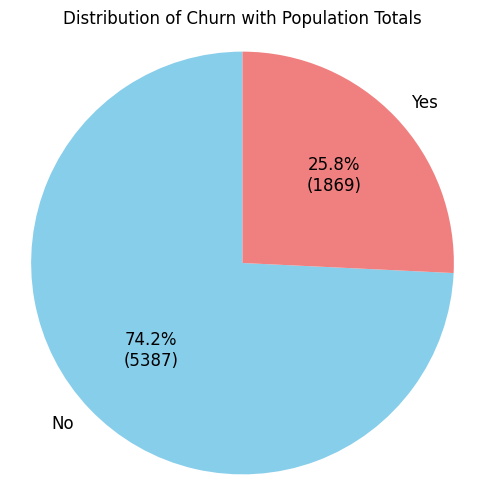

In [ ]:
# Calculate the counts of each Churn category
churn_counts = df_telecomx_cleaned['Churn'].value_counts()

# Define labels (just 'No' and 'Yes' for legend if needed, or can be removed)
labels = ['No', 'Yes']

# Define colors
colors = ['skyblue', 'lightcoral'] # Assuming 0 is 'No' and 1 is 'Yes' after binary conversion

# Define autopct function to format the string with percentage and count
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})' # Percentage and count, with a newline

    return my_format

# Create the pie chart
plt.figure(figsize=(6, 6)) # Reduced figure size by 25%
plt.pie(churn_counts, labels=labels, autopct=autopct_format(churn_counts), startangle=90, colors=colors, textprops={'fontsize': 12}, labeldistance=1.1) # autopct uses custom function, adjusted labeldistance to move text outside
plt.title('Distribution of Churn with Population Totals')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/tmp/ipython-input-3088652288.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


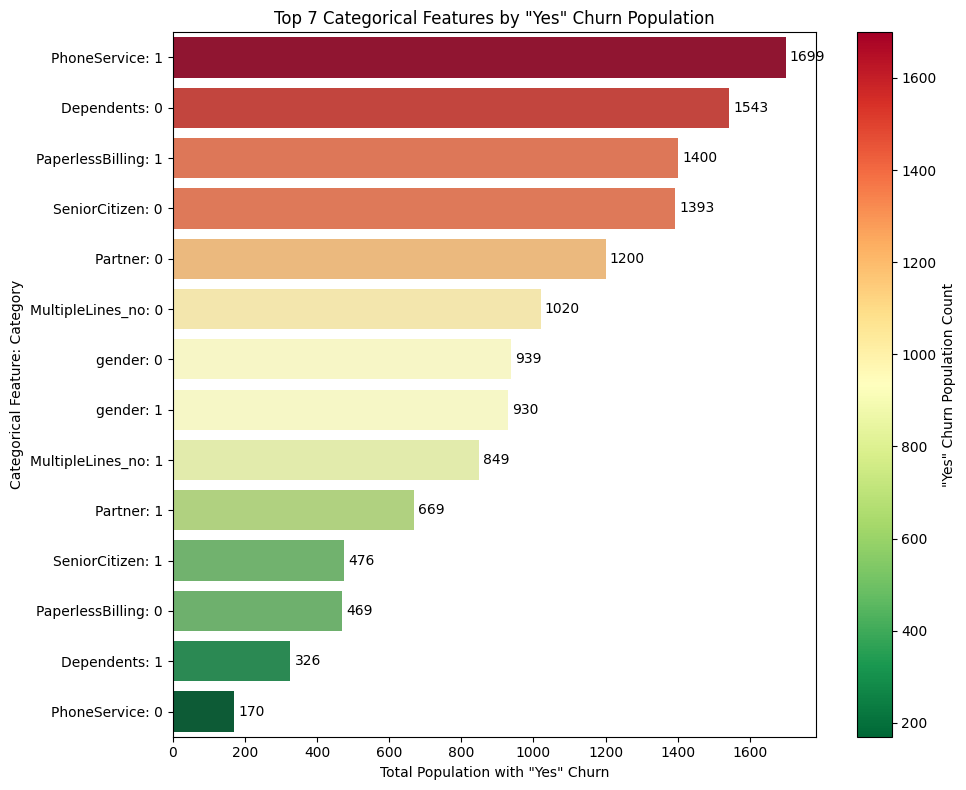

In [ ]:
# Who Churns
# Calculate the number of 'Yes' churn for each category in categorical_cols
churn_yes_counts = {}
for col in categorical_cols:
    # Filter for 'Yes' churn and count occurrences for each category in the column
    churn_yes_counts[col] = df_telecomx_cleaned[df_telecomx_cleaned['Churn'] == 1][col].value_counts()

# Prepare data for plotting: select top 7 features based on total 'Yes' churn count across all categories in that feature
top_features_churn_yes = {}
for col, counts in churn_yes_counts.items():
    if not counts.empty:
      # Sum up 'Yes' churn counts across all categories within this feature
      top_features_churn_yes[col] = counts.sum()

# Select the top 7 features based on the total 'Yes' churn count
top_features = sorted(top_features_churn_yes, key=top_features_churn_yes.get, reverse=True)[:7]

# Now prepare the data specifically for plotting the categories within these top features
plot_data = []
for col in top_features:
    # Get the 'Yes' churn counts for each category within this top feature
    counts = churn_yes_counts[col]
    for category, count in counts.items():
        plot_data.append({'Feature': col, 'Category': category, 'Yes_Churn_Count': count})

plot_df = pd.DataFrame(plot_data)

# Sort the data by Yes_Churn_Count for ordering the bars
plot_df = plot_df.sort_values('Yes_Churn_Count', ascending=False)

# Create a combined label for the y-axis
plot_df['Category_Label'] = plot_df['Feature'] + ': ' + plot_df['Category'].astype(str)

# Plotting
plt.figure(figsize=(10, 8))

# Normalize color scale based on Yes_Churn_Count values
norm = plt.Normalize(plot_df['Yes_Churn_Count'].min(), plot_df['Yes_Churn_Count'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)
sm.set_array([])


ax = sns.barplot(
    data=plot_df,
    x='Yes_Churn_Count',
    y='Category_Label',
    palette=[plt.cm.RdYlGn_r(norm(v)) for v in plot_df['Yes_Churn_Count']],
    legend=False # Address FutureWarning
)

plt.title('Top 7 Categorical Features by "Yes" Churn Population')
plt.xlabel('Total Population with "Yes" Churn')
plt.ylabel('Categorical Feature: Category')

# Add the count labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)


plt.tight_layout()

# Add a color bar and link it to the Axes
cbar = plt.colorbar(sm, ax=ax) # Pass the Axes object
cbar.set_label('"Yes" Churn Population Count')

plt.show()

In [ ]:
# Knowing rates to explain if PhoneService Predict Churn
churn_rate_by_phone = df_telecomx_cleaned.groupby('PhoneService')['Churn'].mean()
print(churn_rate_by_phone)

PhoneService
0    0.241135
1    0.259350
Name: Churn, dtype: float64


In [ ]:
# Churn vs categorical

# Explicit lists — avoids type confusion
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines_no' ,
                    'MultipleLines_no_phone', 'MultipleLines_yes','InternetService_dsl', 'InternetService_fiber_optic', 'InternetService_no',
                    'OnlineSecurity_no',  'OnlineSecurity_no_internet', 'OnlineSecurity_yes', 'OnlineBackup_no', 'OnlineBackup_no_internet',
                    'OnlineBackup_yes', 'DeviceProtection_no', 'DeviceProtection_no_internet', 'DeviceProtection_yes', 'TechSupport_no',
                    'TechSupport_no_internet', 'TechSupport_yes', 'StreamingTV_no', 'StreamingTV_no_internet', 'StreamingTV_yes',
                    'StreamingMovies_no', 'StreamingMovies_no_internet', 'StreamingMovies_yes', 'Contract_month_to_month', 'Contract_one_year',
                    'Contract_two_year', 'PaymentMethod_bank_transfer_auto', 'PaymentMethod_credit_card_auto', 'PaymentMethod_electronic_check',
                    'PaymentMethod_mailed_check']

numerical_cols = ['tenure', 'Charges.Daily', 'Charges.Monthly', 'Charges.Total']  # adjust

# Make sure 'Churn' is in the dataframe
target = 'Churn'


/tmp/ipython-input-2487679323.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Figure size 800x600 with 0 Axes>

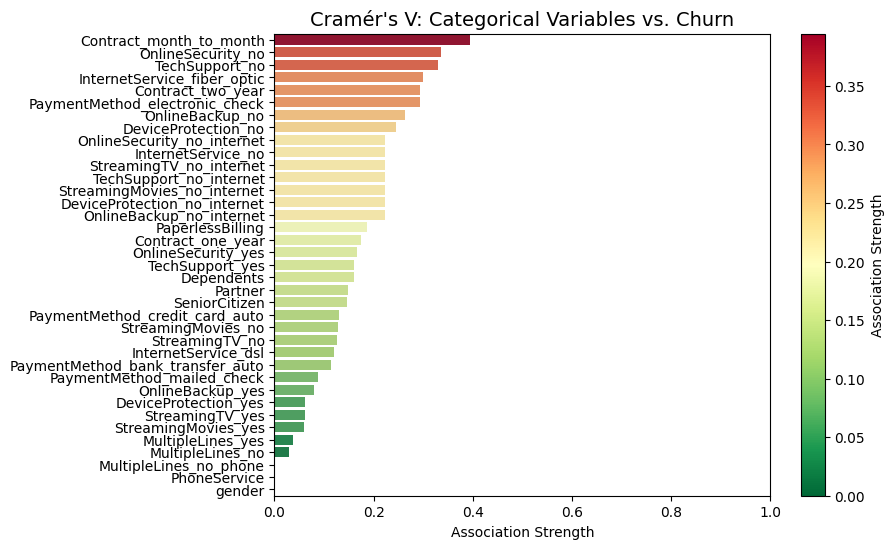

In [ ]:
# Creating crammers V for categorical (Strong churn quality & predictivness)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for each categorical feature vs. Churn
assoc = {col: cramers_v(df_telecomx_cleaned[col], df_telecomx_cleaned[target])
         for col in categorical_cols}

assoc_df = pd.DataFrame(list(assoc.items()), columns=['Variable', 'Association'])

# Sort by association
assoc_df = assoc_df.sort_values('Association', ascending=False)

# Plot horizontally, red = high, green = low
plt.figure(figsize=(8,6))

# Normalize color scale
norm = plt.Normalize(assoc_df['Association'].min(), assoc_df['Association'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)
sm.set_array([])

# Create the plot and keep a reference to its Axes
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(
    data=assoc_df,
    x='Association',
    y='Variable',
    palette=[plt.cm.RdYlGn_r(norm(v)) for v in assoc_df['Association']],
    ax=ax
)

ax.set_title("Cramér's V: Categorical Variables vs. Churn", fontsize=14)
ax.set_xlabel("Association Strength")
ax.set_ylabel("")
ax.set_xlim(0,1)

# Attach colorbar to the same Axes
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Association Strength')

plt.show()

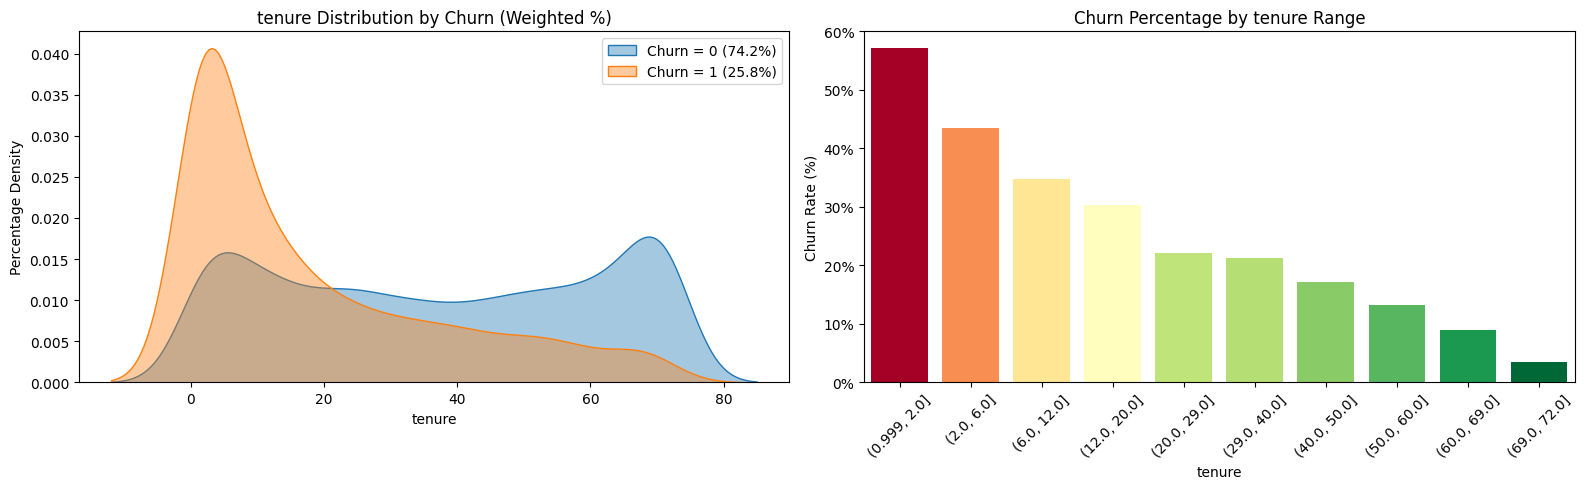

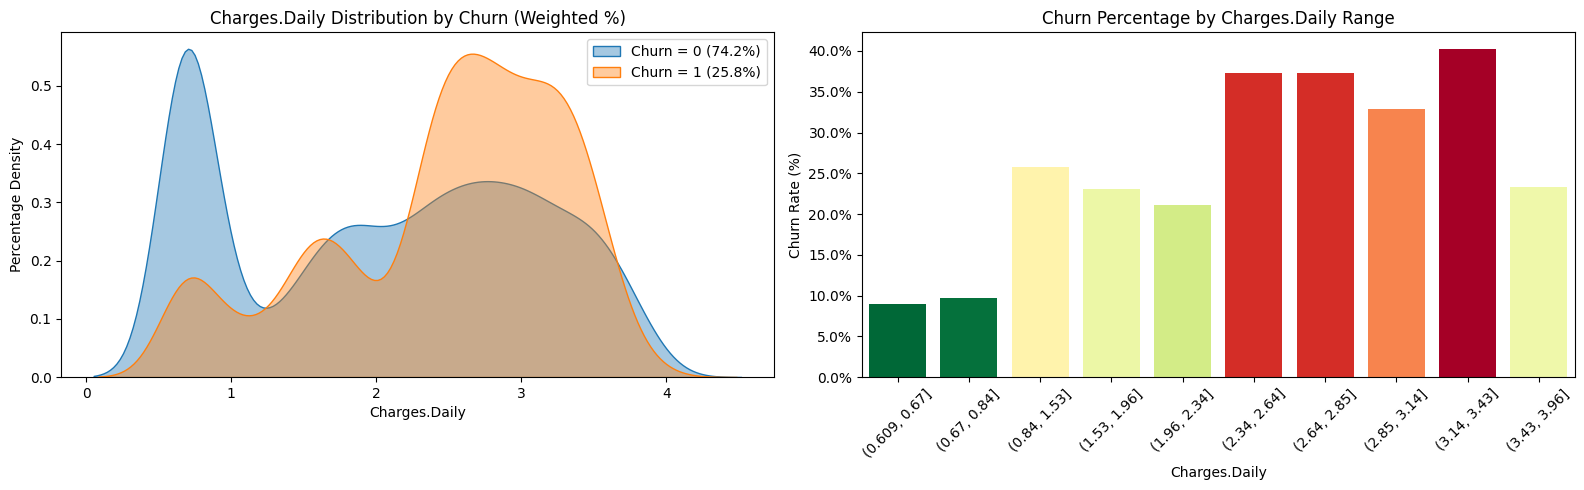

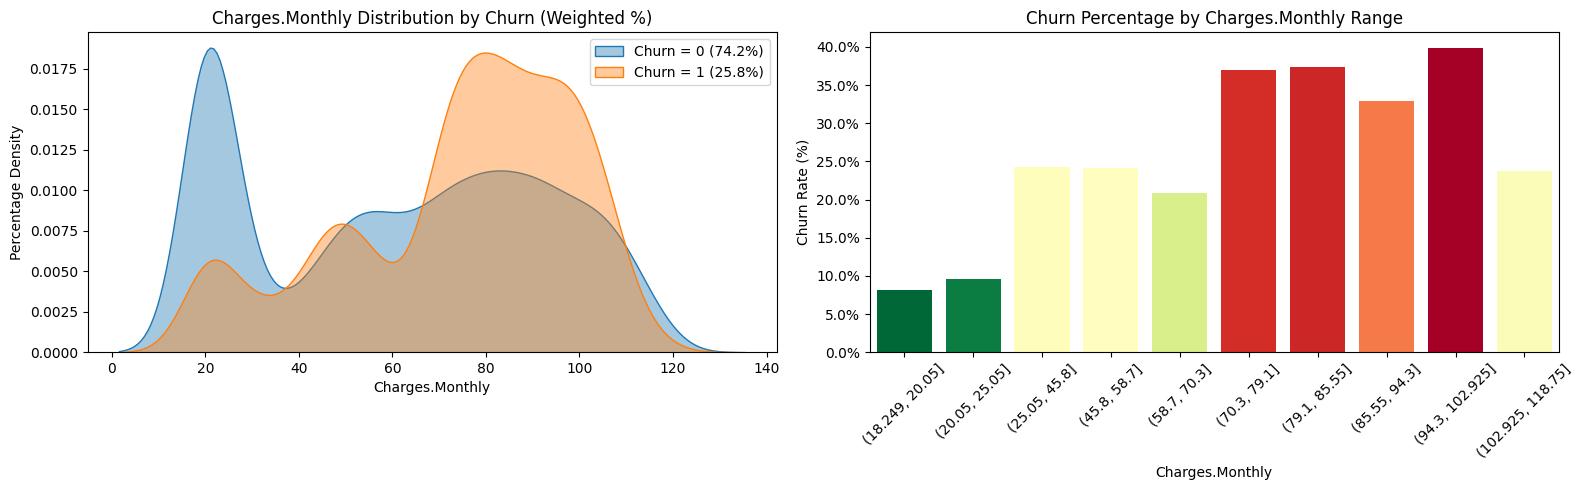

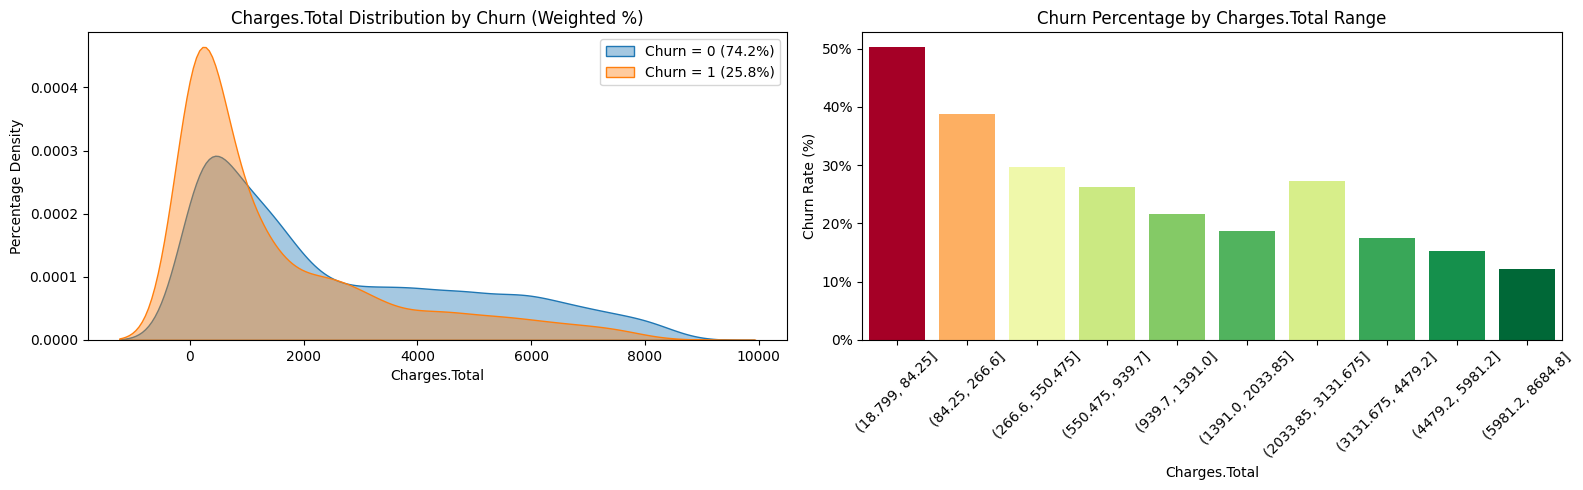

In [ ]:
# Churn vs numeric variables
numerical_cols = ['tenure', 'Charges.Daily', 'Charges.Monthly', 'Charges.Total']
churn_col = "Churn"  # change if your column name differs

for numeric_col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # KDE plot: distribution by churn with weights to show percentages
    for churn_status, subset in df_telecomx_cleaned.groupby(churn_col):
        w = np.ones(len(subset)) / len(df_telecomx_cleaned)
        label = f"Churn = {churn_status} ({len(subset)/len(df_telecomx_cleaned)*100:.1f}%)"
        sns.kdeplot(
            data=subset,
            x=numeric_col,
            weights=w,
            fill=True,
            alpha=0.4,
            label=label,
            ax=axes[0]
        )
    axes[0].set_title(f"{numeric_col} Distribution by Churn (Weighted %)")
    axes[0].set_xlabel(numeric_col)
    axes[0].set_ylabel("Percentage Density")
    axes[0].legend()

    # Binning numeric column into quantiles for churn %
    df_temp = df_telecomx_cleaned.copy()
    df_temp["bin"] = pd.qcut(df_temp[numeric_col], q=10)

    # Calculate churn % per bin for numeric churn (0/1)
    bin_stats = df_temp.groupby("bin", observed=False)[churn_col] \
                       .apply(lambda x: (x == 1).mean() * 100) \
                       .reset_index(name="Churn %")

    # Plot churn % by bin bars
    sns.barplot(data=bin_stats, x="bin", y="Churn %", color='lightgray', ax=axes[1])

    # Color bars: red (high churn) to green (low churn)
    norm = plt.Normalize(bin_stats["Churn %"].min(), bin_stats["Churn %"].max())
    colors = plt.cm.RdYlGn_r(norm(bin_stats["Churn %"]))
    for bar, color in zip(axes[1].patches, colors):
        bar.set_facecolor(color)

    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_title(f"Churn Percentage by {numeric_col} Range")
    axes[1].set_ylabel("Churn Rate (%)")
    axes[1].set_xlabel(numeric_col)
    axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())

    plt.tight_layout()
    plt.show()

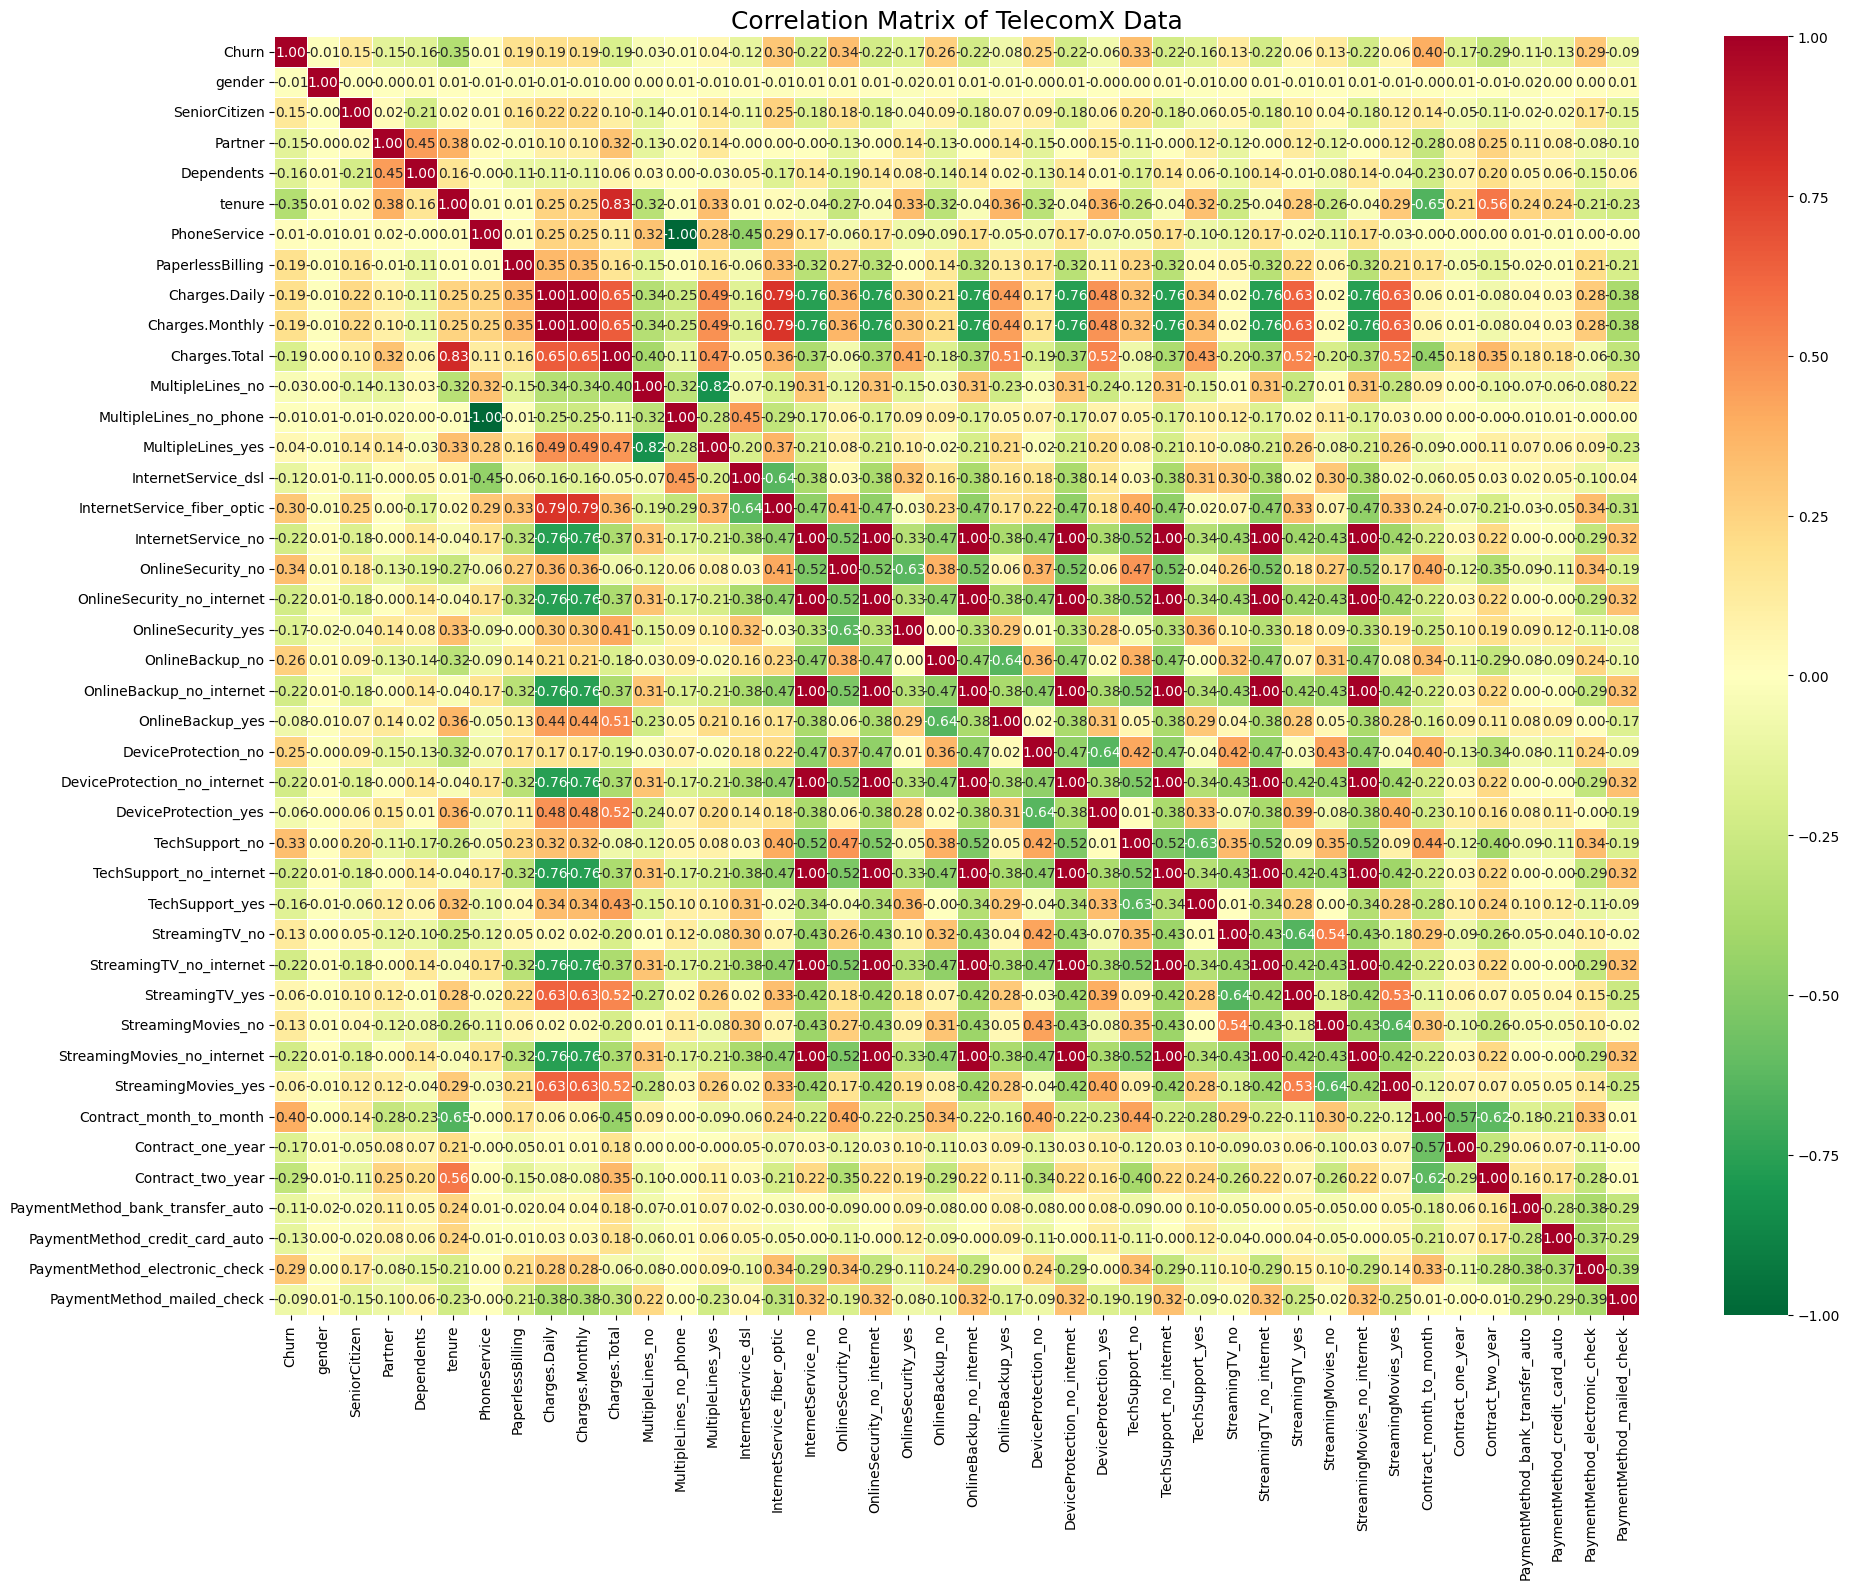

In [ ]:
# Correlation Matrix
# Calculate the correlation matrix, excluding non-numeric types
correlation_matrix = df_telecomx_cleaned.select_dtypes(include=np.number).corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn_r', fmt=".2f", linewidths=.5)

# Set the title of the heatmap
plt.title('Correlation Matrix of TelecomX Data', fontsize=18)

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# Display the heatmap
plt.show()

#📄Informe final

## Introducción

#### <p align="justify"> En este challenge se realizaron procesos de ETL para analizar el Churn de clientes de la empresa TelecomX. El Churn es la cantidad de clientes que deja de tener relaciones comerciales con la empresa, una estadistica muy importante para la toma de decisiones, diagnostico de problemas y estrategias de negocio. </div>

#### <p align="justify"> El Churn sirve como medida de rendimiento para hacer analisis de aceptación de nuevos modelos, servicios y productos ofrecidos, tambien permite indagar sobre la efectividad de operaciones de atencion al cliente, canales de ventas, canales de pago, marketing entre otros. </div>


#### <p align="justify"> Un correcto entendimiento del Churn puede permitir tomar decisiones optimas para combatir perdidas, acaparar nuevos mercados, desarrollar servicios o productos mas estrategicos y crear nuevas soluciones operacionales que en conjunto ayuden a mantener la viabilidad del negocio. </div>

#### <p align="justify"> El Churn de TelecomX se estudio con base en variables categoricas y numericas que representan lo sigiente :

  * customerID: número de identificación único de cada cliente
  * Churn: si el cliente dejó o no la empresa
  *  gender: género (masculino y femenino)
  *  SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
  *  Partner: si el cliente tiene o no una pareja
  *  Dependents: si el cliente tiene o no dependientes
  * tenure: meses de contrato del cliente
  * PhoneService: suscripción al servicio telefónico
  * MultipleLines: suscripción a más de una línea telefónica
  * InternetService: suscripción a un proveedor de internet
  * OnlineSecurity: suscripción adicional de seguridad en línea
  * OnlineBackup: suscripción adicional de respaldo en línea
  * DeviceProtection: suscripción adicional de protección del dispositivo
  * TechSupport: suscripción adicional de soporte técnico, menor tiempo de  espera
  *  StreamingTV: suscripción de televisión por cable
  * StreamingMovies: suscripción de streaming de películas
  * Contract: tipo de contrato
  * PaperlessBilling: si el cliente prefiere recibir la factura en línea
  * PaymentMethod: forma de pago
  * Charges.Monthly: total de todos los servicios del cliente por mes
  * Charges.Total: total gastado por el cliente

#### <p align="justify"> Los objetivos de este Challenge son la limpieza de los datos y encontrar las variables explicativas del Churn. Para realizar estos se hicieron Analisis descriptivos y graficos tanto de concentración poblacional por variable como de correlaciones. Finalmente se dan conclusiones y se proponenen estrategias.


## Limpieza y Tratamiento de Datos

#### <p align="justify"> Estos son los pasos realizados para la limpieza y tratamiento de los datos:

1.   Aplanamiento y normalización.
2.   Revisar tipos, duplicados y valores nulos.
3.   Transformar el tipo de variables a categoricas o numericas.
4.   Tratar nulos según el contexto.
5.   Crear una nueva columna de pagos diarios.
6.   Estandarizar renombrando etiquetas.
7.   Estandarizar valores de variables categorica Yes y No a binario 1 y 0.
8.   Usar one hot encode para variables multi-categoricas.

#### <p align="justify"> El resultado final es un data-frame listo para entrenar modelos de ML.


## Analisis Exploratorio de Datos

#### <p align="justify"> El total del Churn es de 25.8% distribuidos de las siguiente manera:

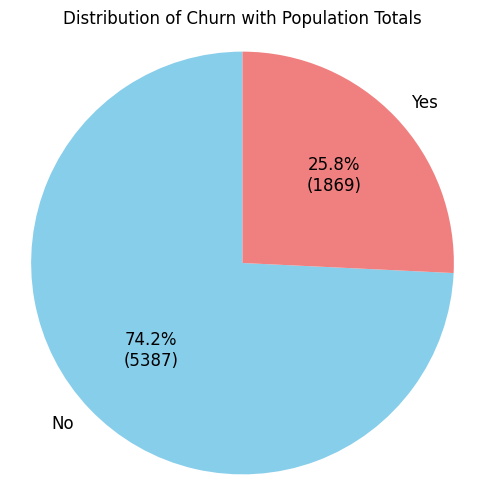

#### <p align="justify"> Las variables que representan a la mayor cantidad de Churns son las siguientes:

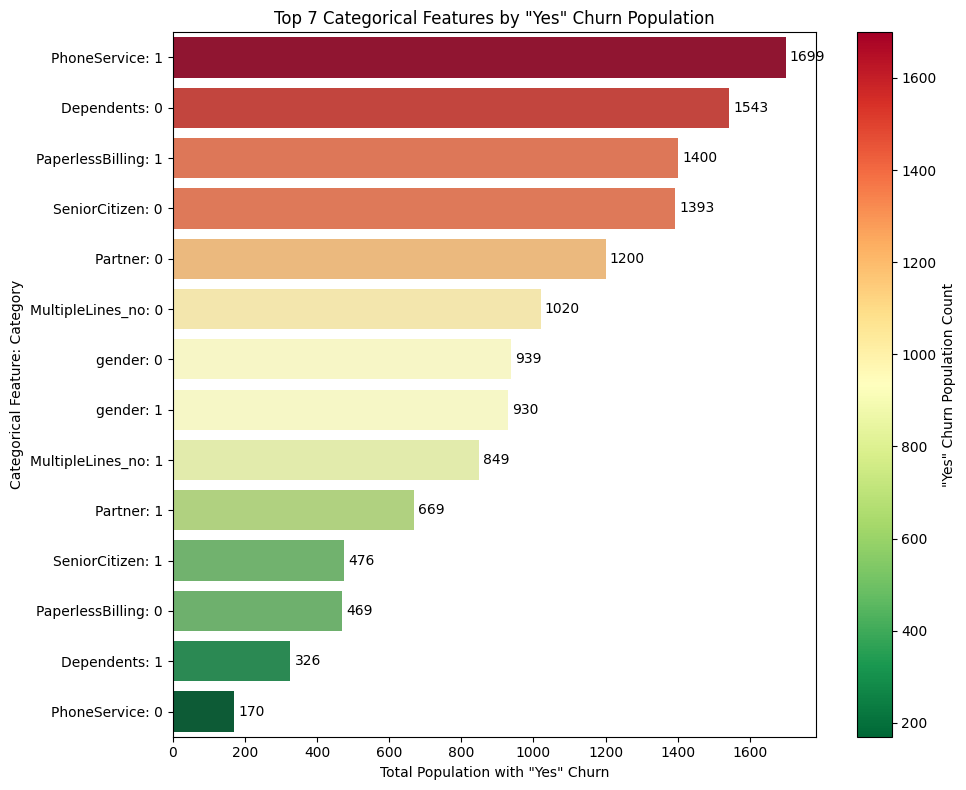

#### <p align="justify"> Siendo PhoneService, NoDependents, SiPaperlessBilling y NoSeniorCitizen las caractaristicas mas comunes entre los Churns en ese orden.

#### <p align="justify"> Sin embargo. Las caracteristicas que predicen mejor el Churn de clientes son las siguientes:

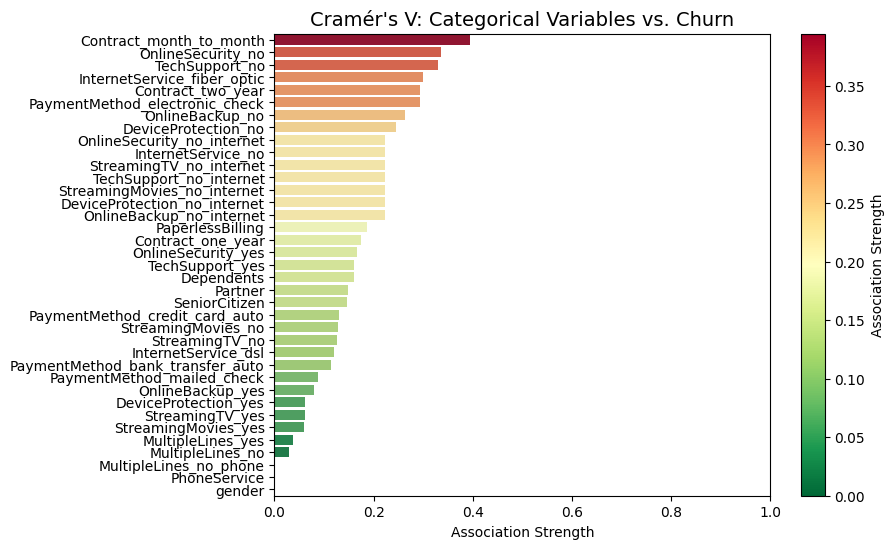

#### <p align="justify"> Contract_month to month es la que variable categorica que mejor predice el churn, seguida de NoOnlineSecurity, NoTechSupport, SiInternet_fiber_optic y Contract_two_year.

#### <p align="justify"> El compartamiento de las variables numericas con respecto al churn es asi:

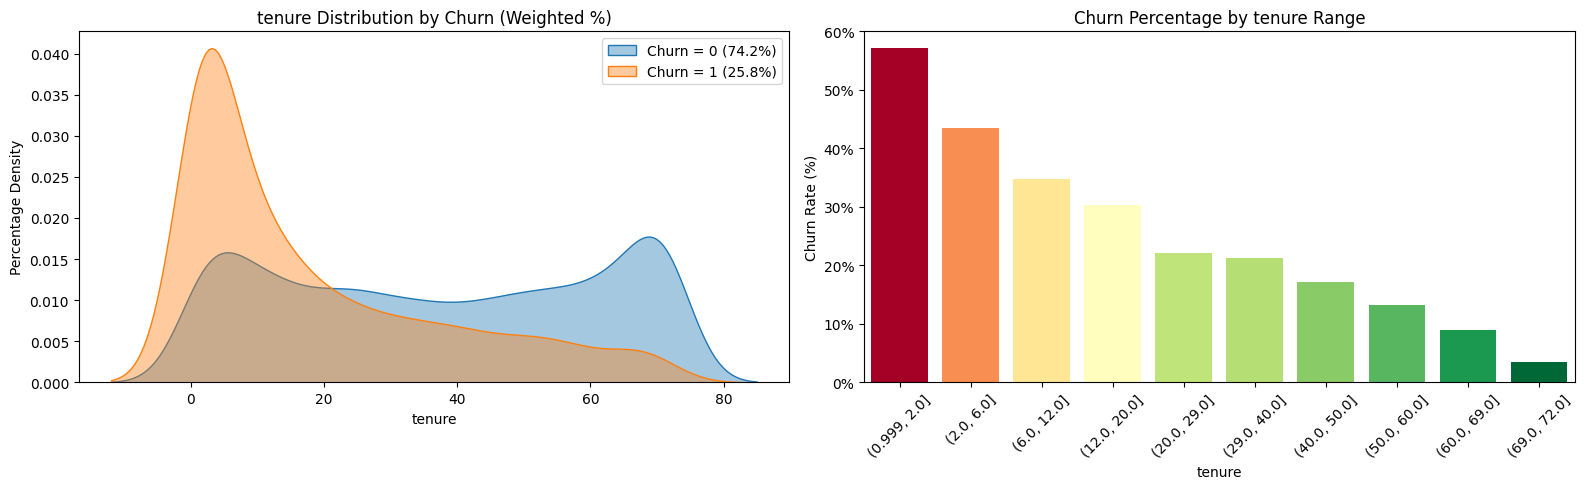




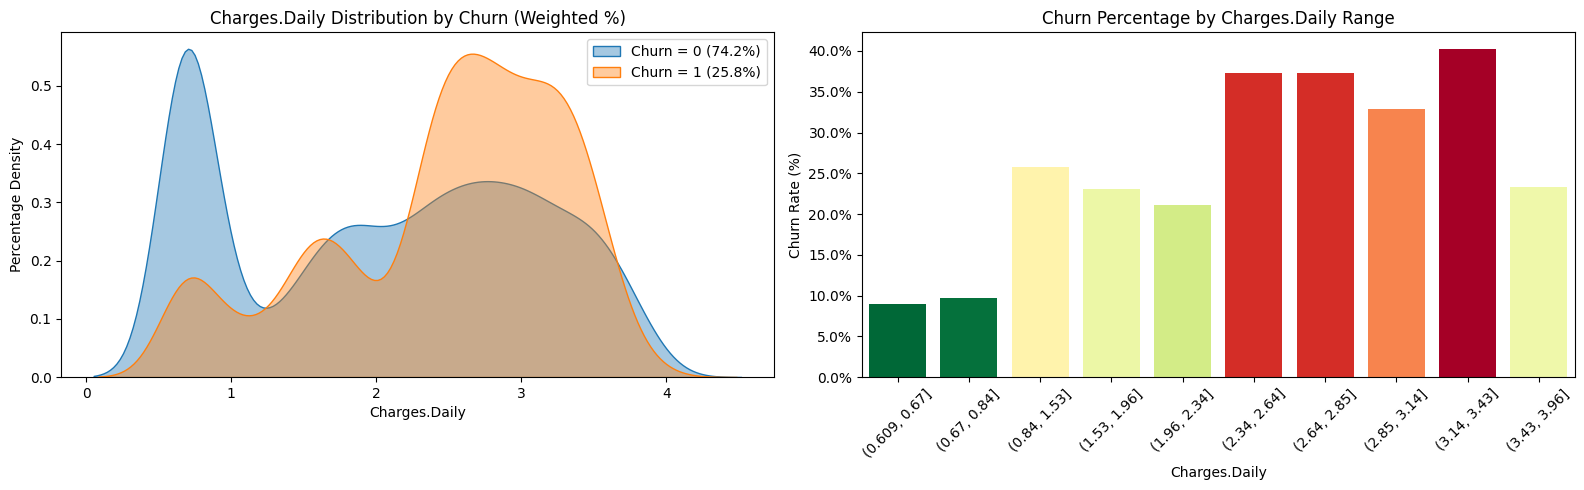

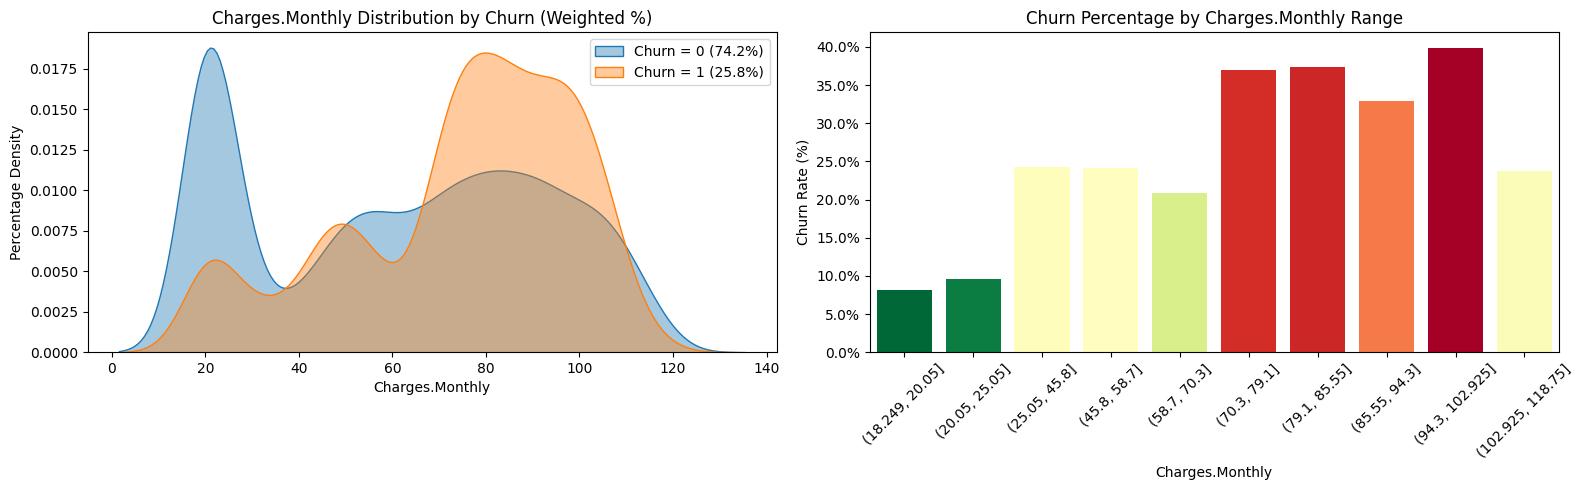

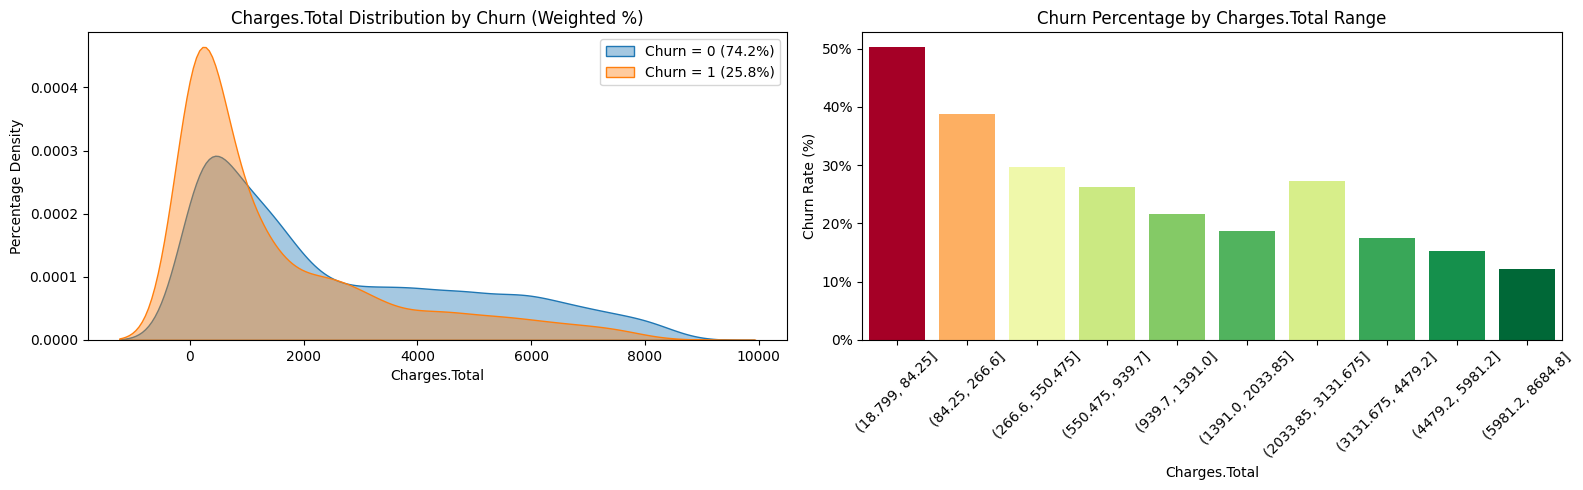

#### <p align="justify"> Se observa que aproximadamente un 60% de los churns dura entre 1 y 2 meses, un 40% tenian cargo diariamente entre 3.14 y 3.43, un 37% tenian cargo mensualmente entre 94.3 y 102 y lo menos que tuvieron de cargo en total alrededor de 84.25.

#### <p align="justify"> La matriz de correlaciones es la siguiente:

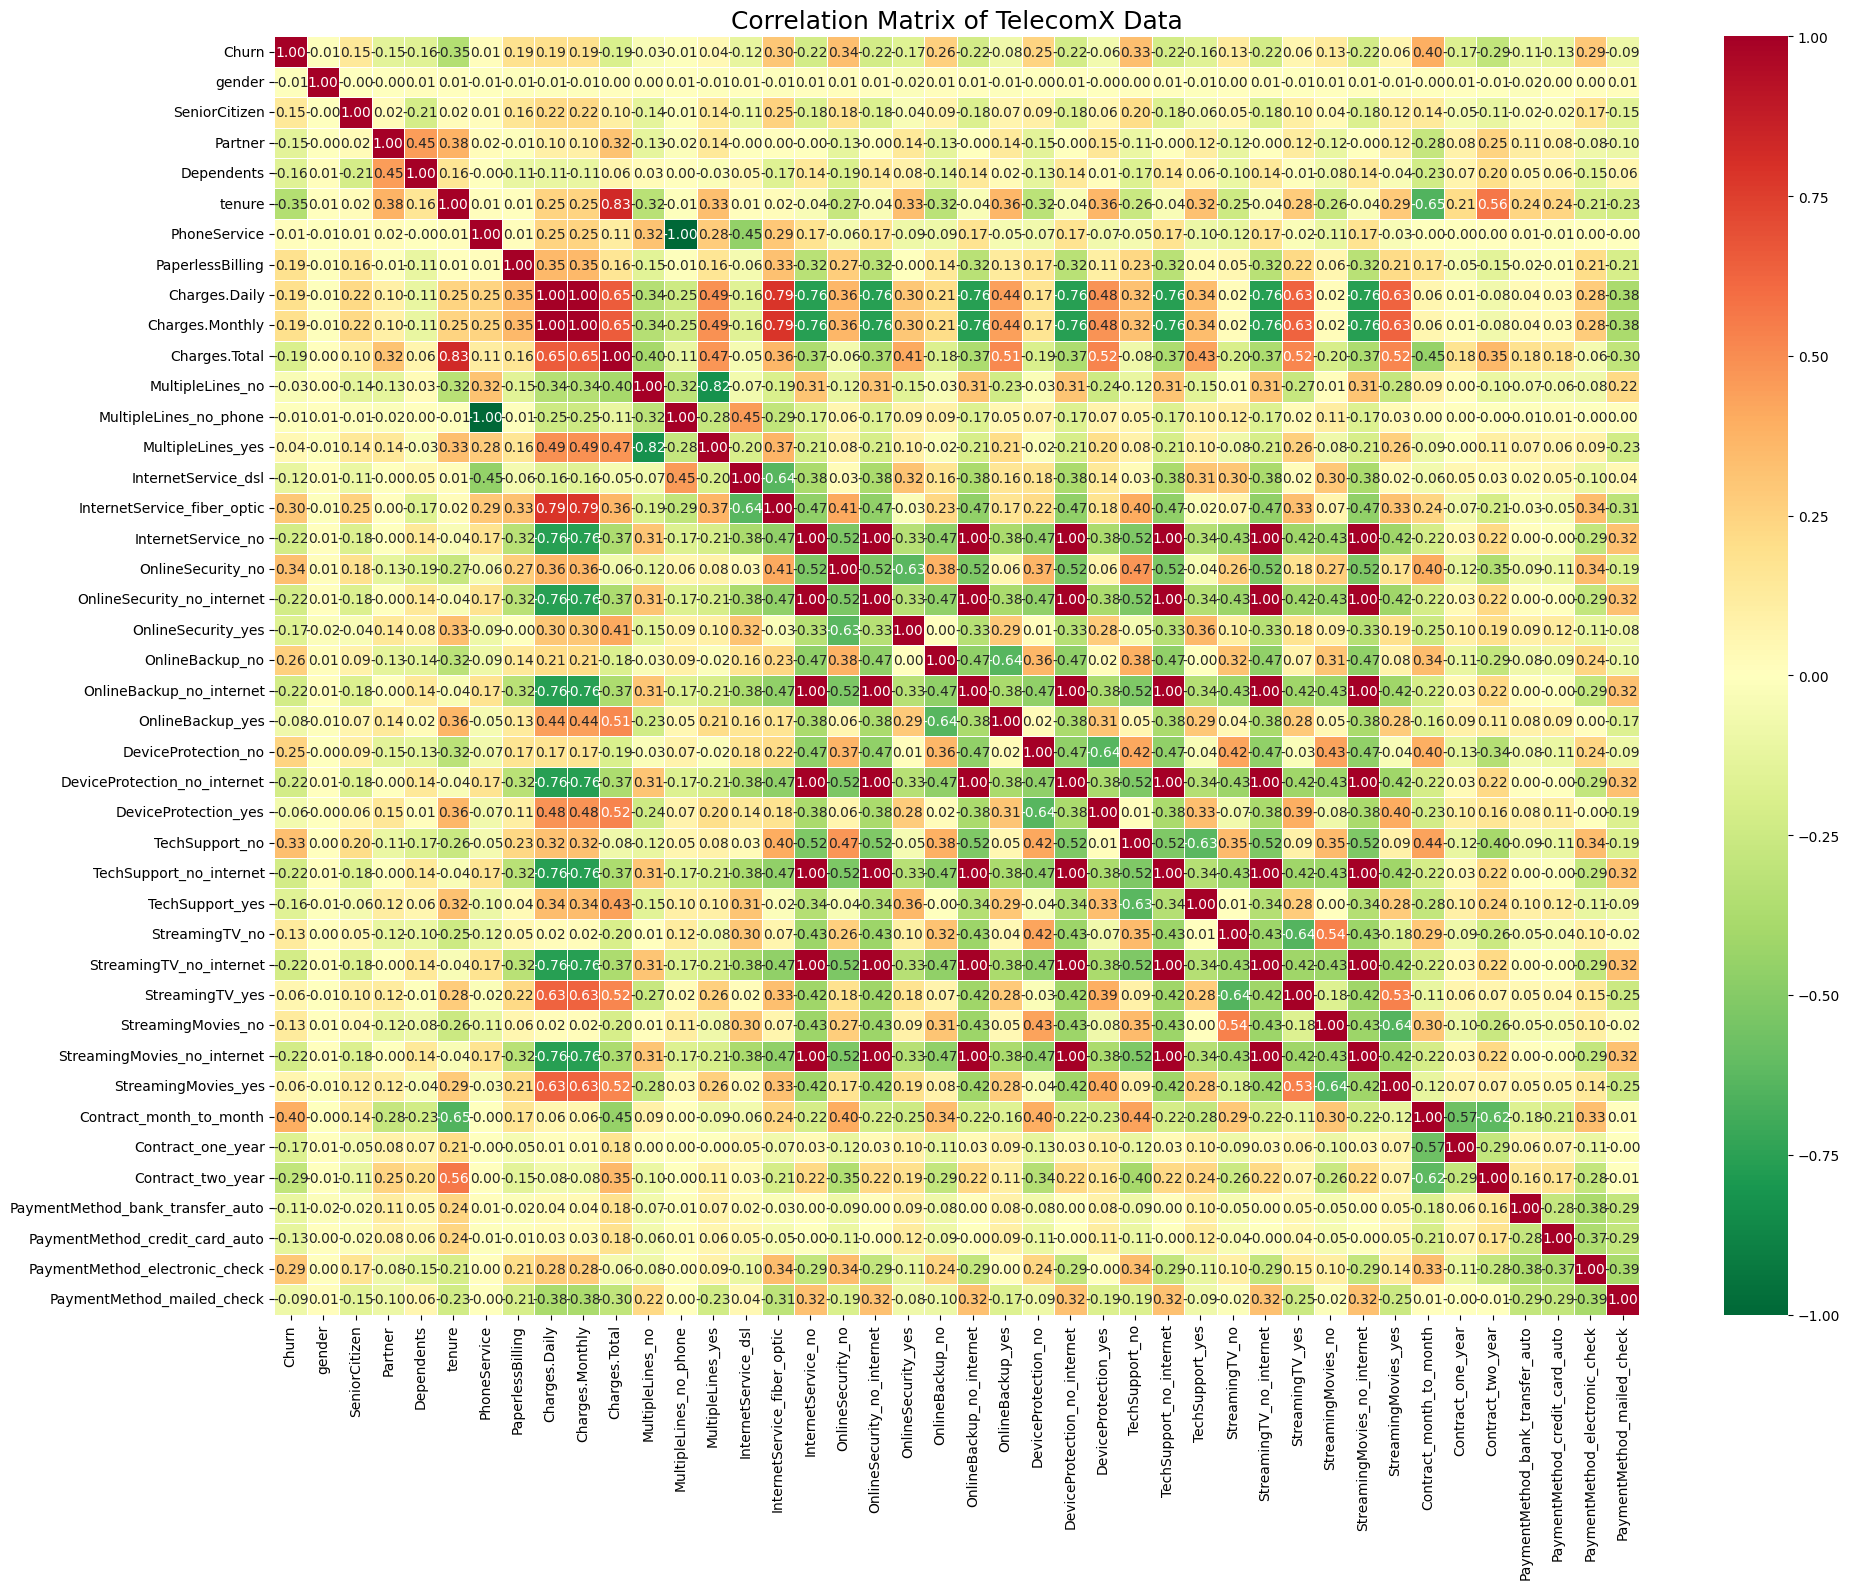

#### <p align="justify"> Se observa que las variables mas correlacionadas con el churn son las mismas que el crammers v.

## Conclusiones e Insights

#### <p align="justify"> El perfil de un cliente Churn en TelecomX es alguien con subscripción al servicio telefonico, menor de 65 años, sin pareja , sin dependientes y prefiere recibir la factura en linea.

#### <p align="justify"> Las variables que mas explican futuros churns son los contratos mes a mes, la no subscripción al servicio de seguridad en linea, la no subscripción al servicio de soporte tecnico rapido, y el que este subscrito a un proveedor de internet.

#### <p align="justify"> Los churns ocurren en su mayoria entre el primer y segundo mes de contrato con cobros diarios entre 3.1 a 3.4 o mensuales de 94 a 102

## Recomendaciones

1. Bajar el precio de los contratos mes a mes y buscar incrementos anuales en vez del plan  de dos años.

2. Disminuir ofrecer a jovenes y adultos servicios de subscripcion a servicio tecnico y seguridad en linea, para reducir costos operativos.

3. El equipo de ventas debe dar prelación a clientes nuevos mayores de 65 años sin servicio a internet o aquellos adultos y jovenes con pareja e hijos.

4. Los cuatro primeros meses no hacer aumentos en los contratos mes a mes.

5. Establecer contratos que tengan un cargo diario menor a $2.34.

6. Mirar procesos de cobranza para eliminar tempranamente cuentas por cobrar de clientes evasores.

7. Ofrecer planes de los servicios de subscripción a clientes con permanencia mayor a un año.

8. Observar tempranamente el compartamiento en cargos y pagos de los clientes que rechazan los servicios de subscripción.